In [2]:
# Code to compute the centrality measures for each degree and put them back into their csv files
import os
import networkx as nx
import pandas as pd

In [3]:
# Path to folder containing edge and node lists
data_folder = "networks"  
output_file = "network_metrics.csv"

# Initialize results list
results = []

# Get all edge list files in the folder
edge_files = sorted([f for f in os.listdir(data_folder) if "edge_list" in f and f.endswith(".csv")])
# Get all node list files in the folder
node_files = sorted([f for f in os.listdir(data_folder) if "node_list" in f and f.endswith(".csv")])


In [4]:
# Iterate through edge list files
for edge_file in edge_files:
    graph_id = edge_file.split("_")[0].strip("'")  # Extract identifier
    node_file = f"{graph_id}_node_list.csv"  # Corresponding node file
    
    # Read node list (if it exists)
    node_path = os.path.join(data_folder, node_file)
    node_df = pd.read_csv(node_path)
    nodes = node_df["Node"].tolist() if os.path.exists(node_path) else []

    # Read edge list
    edge_path = os.path.join(data_folder, edge_file)
    edges = pd.read_csv(edge_path)[["Node1", "Node2"]].values.tolist()

    # Create graph
    G = nx.Graph()
    G.add_nodes_from(nodes)  # Ensure all nodes are included
    G.add_edges_from(edges)

    # Compute centrality measures
    degree_centrality = nx.degree_centrality(G)  # Degree centrality
    betweenness_centrality = nx.betweenness_centrality(G)  # Weighted betweenness
    eigenvector_centrality = nx.eigenvector_centrality(G)  # Eigenvector centrality
    closeness_centrality = nx.closeness_centrality(G)  # Closeness centrality

    # Convert to DataFrame
    centrality_df = pd.DataFrame({
        "Node": list(G.nodes),
        "degree_centrality": [degree_centrality[n] for n in G.nodes],
        "betweenness_centrality": [betweenness_centrality[n] for n in G.nodes],
        "eigenvector_centrality": [eigenvector_centrality[n] for n in G.nodes],
        "closeness_centrality": [closeness_centrality[n] for n in G.nodes],
    })

    # **Remove existing centrality columns if they exist**
    centrality_columns = ["degree_centrality", "betweenness_centrality", "eigenvector_centrality", "closeness_centrality"]
    node_df = node_df.drop(columns=[col for col in centrality_columns if col in node_df], errors="ignore")

    # Merge new centrality measures
    node_df = node_df.merge(centrality_df, on="Node", how="left")

    # Save updated node file
    node_df.to_csv(node_path, index=False)
    print(f"Done {graph_id}")



Done blues
Done classical
Done country
Done disco
Done hiphop
Done jazz
Done metal
Done null
Done pop
Done reggae
Done rock


In [5]:
# Iterate through node files
for node_file in node_files:
    graph_id = node_file.split("_")[0].strip("'")  # Extract identifier

    # Read node file
    node_path = os.path.join(data_folder, node_file)
    node_df = pd.read_csv(node_path)

    # Store the result
    results.append({
        "Graph": graph_id,
        "Degree Centrality": node_df.loc[node_df["degree_centrality"].idxmax()]["Node"],
        "Betweenness Centrality": node_df.loc[node_df["betweenness_centrality"].idxmax()]["Node"],
        "Eigenvector Centrality": node_df.loc[node_df["eigenvector_centrality"].idxmax()]["Node"],
        "Closeness Centrality": node_df.loc[node_df["closeness_centrality"].idxmax()]["Node"],
    })

# Convert results to a DataFrame
centrality_comparison_df = pd.DataFrame(results)

# Save to CSV
centrality_comparison_df.to_csv("most_central_nodes.csv", index=False)


In [6]:
centrality_comparison_df

,Graph,Degree Centrality,Betweenness Centrality,Eigenvector Centrality,Closeness Centrality
0,blues,313,11,313,417
1,classical,398,11,398,535
2,country,313,467,313,39
3,disco,185,533,392,503
4,hiphop,392,361,392,392
5,jazz,395,533,395,533
6,metal,313,102,313,573
7,null,313,108,313,313
8,pop,395,221,395,3
9,reggae,313,11,313,428


In [7]:
# Define the regions to analyze
regions = ['Vis', 'SomMot', 'DorsAttn_Post', 'DorsAttn_FEF', 'DorsAttn_PrCv',
 'SalVentAttn_ParOper', 'SalVentAttn_TempOcc', 'SalVentAttn_FrOperIns',
 'SalVentAttn_PFCl', 'SalVentAttn_Med', 'Limbic_OFC', 'Limbic_TempPole',
 'Cont_Par', 'Cont_Temp', 'Cont_PFCd', 'Cont_OFC', 'Cont_PFCl', 'Cont_PFCv',
 'Cont_pCun', 'Cont_Cing', 'Cont_PFCmp', 'Default_Temp', 'Default_Par',
 'Default_PFC', 'Default_pCunPCC', 'Default_PHC', 'SalVentAttn_TempOccPar',
 'SalVentAttn_PrC', 'Default_PFCv', 'Default_PFCdPFCm']

networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']

measures = ["degree_centrality", "betweenness_centrality", "eigenvector_centrality", "closeness_centrality"]

for measure in measures:
    # Iterate through node files
    # List to store the results
    graph_region_data = []
    network_region_data = []
    
    for node_file in node_files:
        graph_id = node_file.split("_")[0]  # Extract graph identifier
        node_path = os.path.join(data_folder, node_file)
        node_df = pd.read_csv(node_path)

        # Ensure the required columns exist
        if "Region" in node_df.columns and measure in node_df.columns:
            region_avg = {"Graph_ID": graph_id}
            network_avg = {"Graph_ID": graph_id}

            # Compute the average degree centrality for each region
            for region in regions:
                region_nodes = node_df[node_df["Region"] == region]
                avg_centrality = region_nodes[measure].mean() if not region_nodes.empty else None
                region_avg[region] = avg_centrality

            # Extract network names (everything before the first "_")
            node_df["Network_Group"] = node_df["Region"].str.split("_").str[0]

            for network in networks:
                network_nodes = node_df[node_df["Network_Group"] == network]
                avg_centrality = network_nodes[measure].mean() if not network_nodes.empty else None
                network_avg[network] = avg_centrality

            # Store the results
            graph_region_data.append(region_avg)
            network_region_data.append(network_avg)

    # Convert results to a DataFrame
    graph_region_df = pd.DataFrame(graph_region_data)
    graph_network_df = pd.DataFrame(network_region_data)

    # Save to CSV
    output_file = f"centrality/region_{measure}.csv"
    graph_region_df.to_csv(output_file, index=False)

    output_file = f"centrality/7Network_{measure}.csv"
    graph_network_df.to_csv(output_file, index=False)



In [8]:
import os
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define the regions to analyze
regions = ['Vis', 'SomMot', 'DorsAttn_Post', 'DorsAttn_FEF', 'DorsAttn_PrCv',
 'SalVentAttn_ParOper', 'SalVentAttn_TempOcc', 'SalVentAttn_FrOperIns',
 'SalVentAttn_PFCl', 'SalVentAttn_Med', 'Limbic_OFC', 'Limbic_TempPole',
 'Cont_Par', 'Cont_Temp', 'Cont_PFCd', 'Cont_OFC', 'Cont_PFCl', 'Cont_PFCv',
 'Cont_pCun', 'Cont_Cing', 'Cont_PFCmp', 'Default_Temp', 'Default_Par',
 'Default_PFC', 'Default_pCunPCC', 'Default_PHC', 'SalVentAttn_TempOccPar',
 'SalVentAttn_PrC', 'Default_PFCv', 'Default_PFCdPFCm']

networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
measures = ["degree_centrality", "betweenness_centrality", "eigenvector_centrality", "closeness_centrality"]

# Store statistical results
stats_results = []

for measure in measures:
    network_data = []  # Store data for all graphs (all genres)

    for node_file in node_files:
        if node_file == "null_node_list.csv":
            continue
        graph_id = node_file.split("_")[0]  # Extract genre identifier
        node_path = os.path.join(data_folder, node_file)
        node_df = pd.read_csv(node_path)

        if "Region" in node_df.columns and measure in node_df.columns:
            node_df["Network_Group"] = node_df["Region"].str.split("_").str[0]

            for network in networks:
                network_nodes = node_df[node_df["Network_Group"] == network]

                if len(network_nodes) > 1:  # Ensure we have enough data points
                    for _, row in network_nodes.iterrows():
                        network_data.append({
                            "Graph_ID": graph_id,
                            "Network": network,
                            "Centrality": row[measure]
                        })

    # Convert to DataFrame
    network_df = pd.DataFrame(network_data)

    # Perform ANOVA for each network
    for network in networks:
        network_subset = network_df[network_df["Network"] == network]

        if network_subset.empty:
            continue  # Skip if no data

        groups = [network_subset[network_subset["Graph_ID"] == g]["Centrality"].values 
                  for g in network_subset["Graph_ID"].unique()]

        if len(groups) > 1 and all(len(g) > 1 for g in groups):  # Ensure valid data for ANOVA
            anova_p = stats.f_oneway(*groups).pvalue
        else:
            anova_p = float('nan')  # Not enough data

        stats_results.append({"Network": network, "Measure": measure, "P-Value": anova_p})

        # If significant, run Tukey's HSD
        if anova_p < 0.05:
            print(f"\nSignificant difference found in {network} ({measure})! Running Tukey's HSD...\n")
            tukey = pairwise_tukeyhsd(network_subset["Centrality"], network_subset["Graph_ID"], alpha=0.05)
            print(tukey)

# Convert results to DataFrame
stats_df = pd.DataFrame(stats_results)




Significant difference found in SomMot (degree_centrality)! Running Tukey's HSD...

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    blues classical  -0.0012    1.0 -0.0149  0.0126  False
    blues   country   0.0044 0.9919 -0.0094  0.0181  False
    blues     disco   0.0088 0.5824  -0.005  0.0225  False
    blues    hiphop   0.0009    1.0 -0.0129  0.0146  False
    blues      jazz     0.01 0.3847 -0.0037  0.0237  False
    blues     metal   0.0029 0.9997 -0.0109  0.0166  False
    blues       pop   0.0039 0.9964 -0.0098  0.0177  False
    blues    reggae  -0.0038 0.9971 -0.0175  0.0099  False
    blues      rock  -0.0026 0.9999 -0.0164  0.0111  False
classical   country   0.0055 0.9589 -0.0082  0.0193  False
classical     disco   0.0099 0.3942 -0.0038  0.0237  False
classical    hiphop    0.002    1.0 -0.0117  0.0158  False
classical      jazz   0.0112 0

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
data_folder = "centrality"
output_folder = "plots"
os.makedirs(output_folder, exist_ok=True)

# Define networks and centrality measures
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
measures = ["degree_centrality", "betweenness_centrality", "eigenvector_centrality", "closeness_centrality"]

# Iterate over each centrality measure
for measure in measures:
    # Load the corresponding data
    file_path = os.path.join(data_folder, f"7Network_{measure}.csv")
    df = pd.read_csv(file_path)

    # Assume Graph_ID corresponds to different music genres
    df.rename(columns={"Graph_ID": "Music_Genre"}, inplace=True)

    # Convert to long format for easier plotting
    df_long = df.melt(id_vars=["Music_Genre"], var_name="Network", value_name="Centrality")

    # Plot each network separately
    for network in networks:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_long[df_long["Network"] == network], x="Music_Genre", y="Centrality", palette="viridis")
        plt.xticks(rotation=45)
        plt.title(f"{measure.replace('_', ' ').title()} in {network} Network Across Genres")
        plt.ylabel(measure.replace('_', ' ').title())
        plt.xlabel("Music Genre")
        plt.tight_layout()

        # Save the plot
        plot_filename = f"{output_folder}/{measure}_{network}.png"
        plt.savefig(plot_filename)
        plt.close()

print("Plots saved successfully.")


C:\Users\ekkid\AppData\Local\Temp\ipykernel_35372\601085666.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_long[df_long["Network"] == network], x="Music_Genre", y="Centrality", palette="viridis")
C:\Users\ekkid\AppData\Local\Temp\ipykernel_35372\601085666.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_long[df_long["Network"] == network], x="Music_Genre", y="Centrality", palette="viridis")
C:\Users\ekkid\AppData\Local\Temp\ipykernel_35372\601085666.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_long[d

Plots saved successfully.


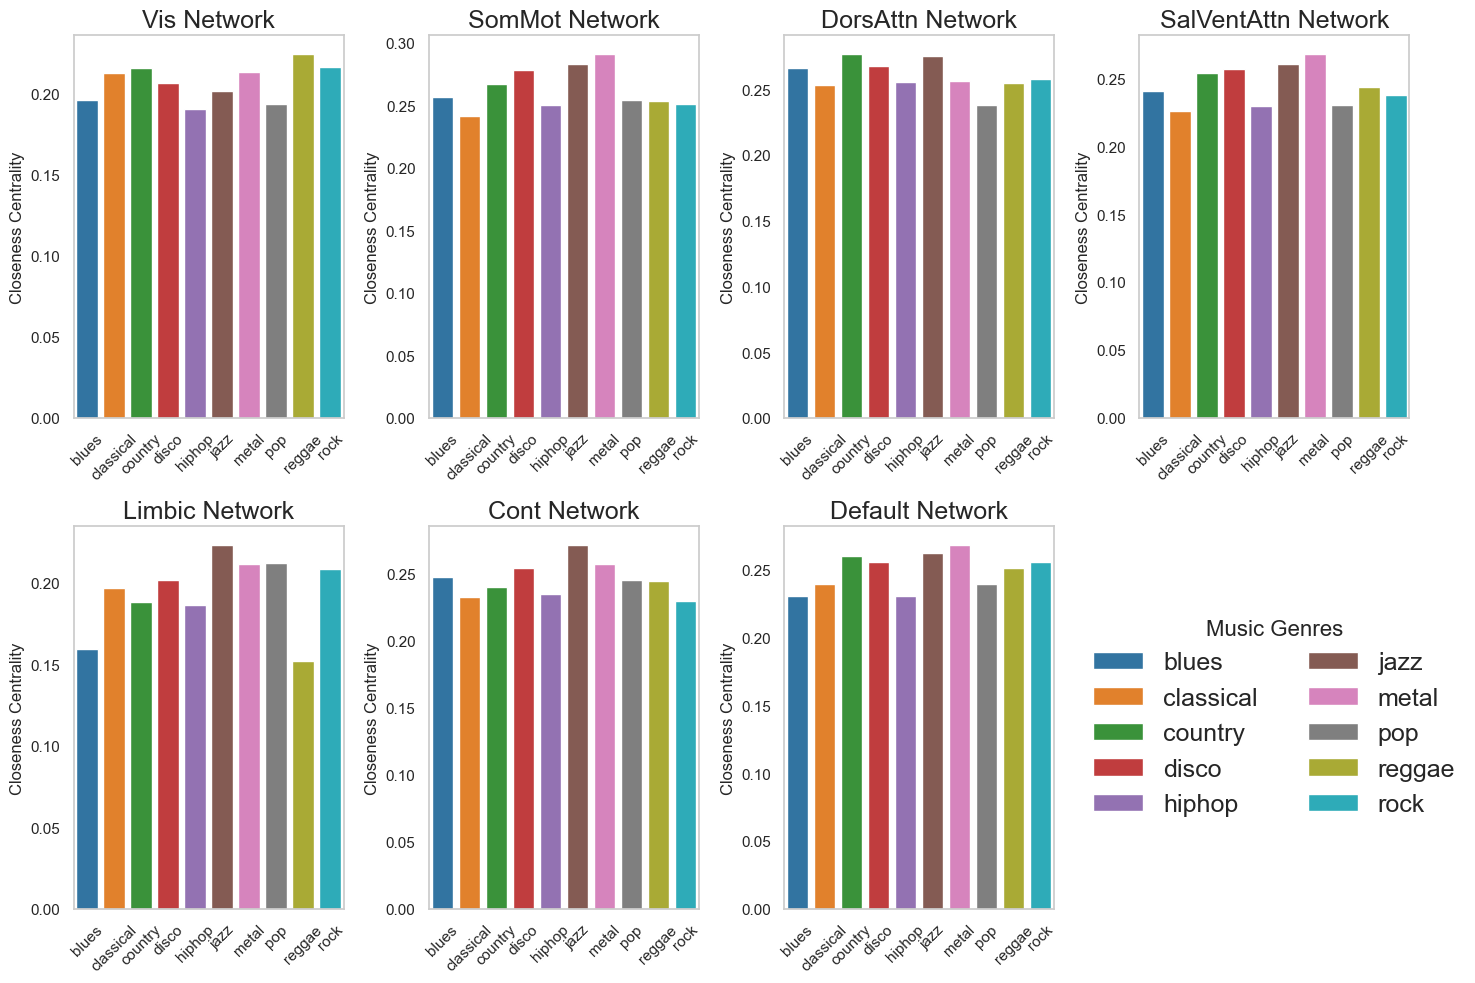

Plot saved as plots/closeness_centrality_all_networks.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
data_folder = "centrality"
output_folder = "plots"
os.makedirs(output_folder, exist_ok=True)

# Choose the centrality measure to visualize
measure = "closeness_centrality"  # Change this to any centrality measure

# Load the data
file_path = os.path.join(data_folder, f"7Network_{measure}.csv")
df = pd.read_csv(file_path)

# Rename column for clarity
df.rename(columns={"Graph_ID": "Music_Genre"}, inplace=True)

# Convert data to long format for plotting
df_long = df.melt(id_vars=["Music_Genre"], var_name="Network", value_name="Centrality")

# Define figure size
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))  # 7 networks → 2 rows, 4 columns
axes = axes.flatten()  # Flatten to easily index the subplots

# Initialize legend handles
handles, labels = None, None

# Plot each network in a separate subplot
for i, network in enumerate(df_long["Network"].unique()):
    ax = axes[i]
    network_data = df_long[df_long["Network"] == network]
    
    # Create the barplot with hue for genres
    barplot = sns.barplot(data=network_data, x="Music_Genre", y="Centrality", ax=ax, hue="Music_Genre", palette="tab10")
    
    ax.set_title(f"{network} Network", fontsize=18)
    ax.set_xlabel("")
    ax.set_ylabel(measure.replace("_", " ").title())
    ax.tick_params(axis='x', rotation=45)

    ax.grid(False)
    
    # Capture handles and labels from the first subplot
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()

    # Remove individual legends from each subplot
    ax.get_legend().remove()

# Use the last subplot (8th one) for the legend
axes[-1].axis("off")  # Hide the last subplot
axes[-1].legend(
    handles, labels,
    loc="center",
    fontsize=18,          # Increase font size of legend labels
    title="Music Genres", # Set title for clarity
    title_fontsize=16,    # Increase font size of legend title
    ncol=2,               # Arrange items in 2 columns
    frameon=False         # Remove legend border for cleaner look
)

plt.tight_layout()
plot_filename = f"{output_folder}/{measure}_all_networks.png"
#plt.savefig(plot_filename)
plt.show()

print(f"Plot saved as {plot_filename}")
